In [1]:
# Titanic Survival Dataset – ML Evaluation using Decision Tree
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
#Load dataset
df = pd.read_csv("Titanic-Dataset.csv")
print(df.head())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [4]:
#Feature Cleaning
df = df.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], errors='ignore')

In [5]:
# Fill missing age values with median (best for skewed data)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

C:\Users\Fathima Suha\AppData\Local\Temp\ipykernel_11976\425459562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Fathima Suha\AppData\Local\Temp\ipykernel_11976\425459562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [6]:
#Encode Categorical Columns
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
print("\nAfter encoding columns:", df.columns)


After encoding columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [7]:
# Split Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [8]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
#Scaling (improves model stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train model (Decision Tree)
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# Predictions
y_pred = model.predict(X_test)

#Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTitanic Model Evaluation:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Titanic Model Evaluation:
Accuracy: 0.7877094972067039
Precision: 0.8444444444444444
Recall: 0.5507246376811594
F1 Score: 0.6666666666666666


In [14]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[103   7]
 [ 31  38]]


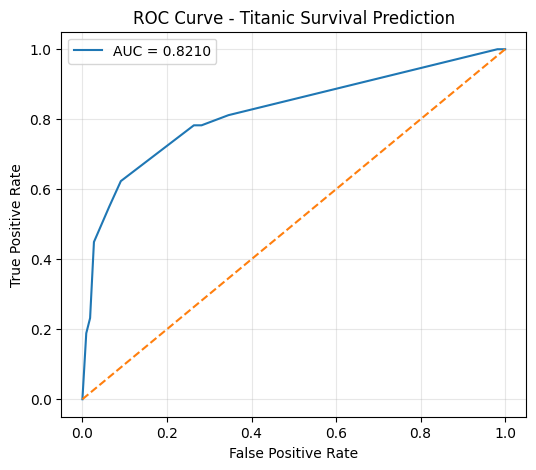

In [16]:
#ROC Curve + AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Titanic Survival Prediction")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [17]:
# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Avg Accuracy:", cv_scores.mean(), "| Scores:", cv_scores)


Cross-Validation Avg Accuracy: 0.805881614462369 | Scores: [0.76536313 0.8258427  0.80898876 0.78651685 0.84269663]


In [18]:
# Feature Engineering Impact Test
# Remove top feature 'Sex' (most impactful)
X_fe = df.drop(columns=["Survived", "Sex_male"], errors='ignore')
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y, test_size=0.2, random_state=42, stratify=y
)
X_train_fe = scaler.fit_transform(X_train_fe)
X_test_fe = scaler.transform(X_test_fe)

model_fe = DecisionTreeClassifier(max_depth=4, random_state=42)
model_fe.fit(X_train_fe, y_train_fe)
pred_fe = model_fe.predict(X_test_fe)
print("\nAccuracy WITHOUT Sex Feature:", accuracy_score(y_test_fe, pred_fe))


Accuracy WITHOUT Sex Feature: 0.6703910614525139
